In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
def ce_loss(y, y_hat):
    def f(y, y_hat):
        return -y * np.log(y_hat)
    return f(1-y, 1-y_hat) + f(y, y_hat)


def focal_loss(y, y_hat, alpha=0.25, gamma=2, reduce=None):
    p = y_hat
    targets = y
    ce_loss_val = ce_loss(y, y_hat)
    p_t = p * targets + (1 - p) * (1 - targets)
    # loss = ce_loss_val * ((1 - p_t) ** gamma)
    loss = ce_loss_val * (np.sqrt(1-p_t))

    if alpha >= 0:
        alpha_t = alpha * targets + (1 - alpha) * (1 - targets)
        loss = alpha_t * loss
    return loss

In [2]:
y = np.array([0] * 5 + [1] * 5)
y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [65]:
y_hat = np.array(
    [
        0.512, 0.534, 0.3, 0.1, 0.05,
        0.492, 0.487, 0.7, 0.6, 0.9
    ]
)

In [66]:
result = pd.DataFrame(
    {
        'ce_loss': ce_loss(y, y_hat),
        'focal_loss': focal_loss(y, y_hat)
    }
)

<Axes: >

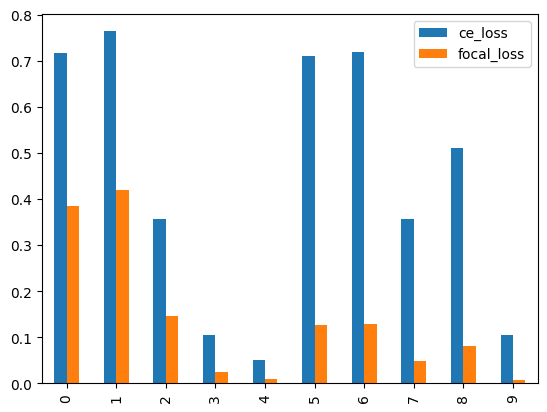

In [67]:
result.plot.bar()

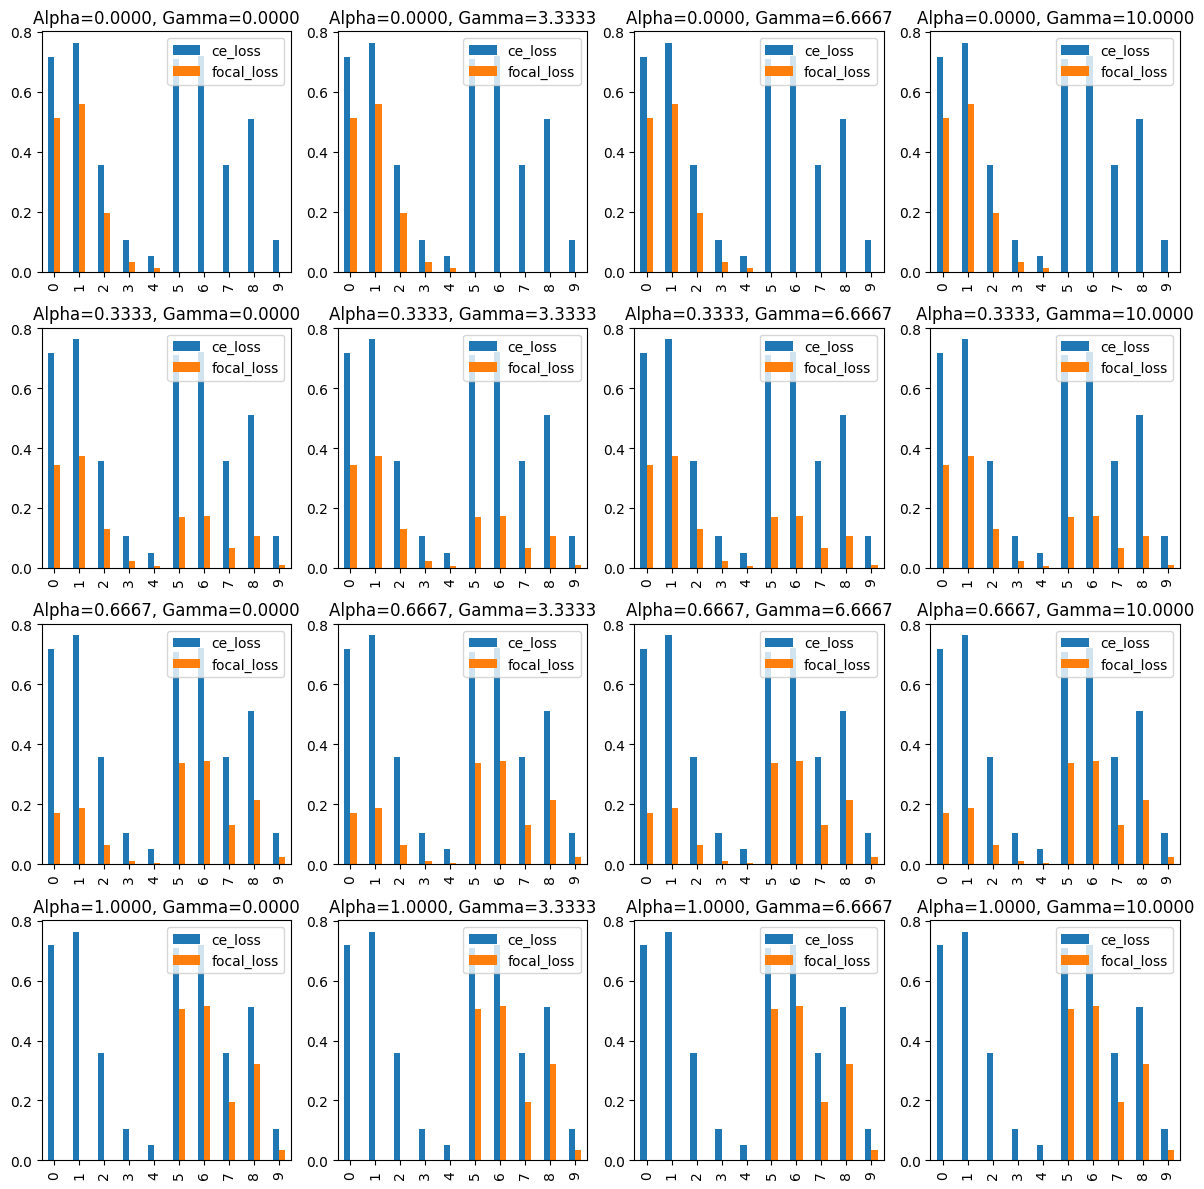

In [68]:
row_num = 4
col_num = 4
alphas = np.linspace(0, 1, row_num)
gammas = np.linspace(0, 10, col_num)

fig, axs = plt.subplots(row_num, col_num, figsize=(12, 12))

for i in range(row_num):
    for j in range(col_num):
        ax = axs[i, j]
        alpha = alphas[i]
        gamma = gammas[j]
        result = pd.DataFrame(
            {
                'ce_loss': ce_loss(y, y_hat),
                'focal_loss': focal_loss(y, y_hat, alpha, gamma)
            }
        )
        result.plot.bar(ax=ax)
        ax.set_title(f'Alpha={alpha:.4f}, Gamma={gamma:.4f}')

plt.tight_layout()
plt.show()